# 5-1 正态线性模型：一元回归

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline

In [3]:
beer = pd.read_csv('5-1-1-beer.csv')
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


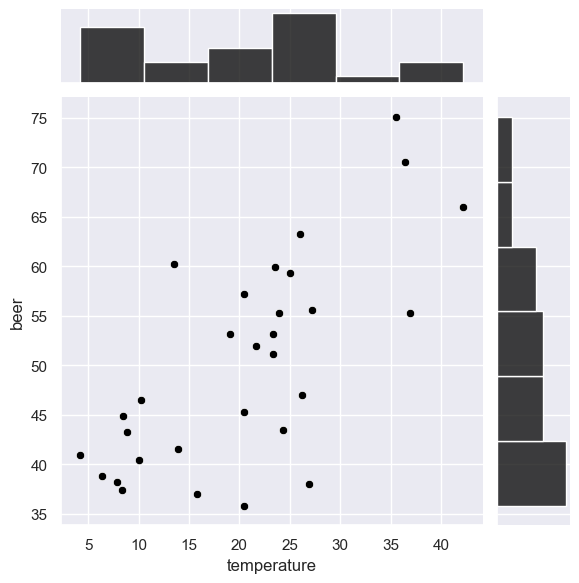

In [4]:
sns.jointplot(x="temperature", y="beer", data=beer, color='black')

In [5]:
lm_model = smf.ols(formula="beer ~ temperature", data=beer).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Tue, 28 May 2024   Prob (F-statistic):           1.11e-05
Time:                        20:37:54   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 使用AIC进行模型选择

In [6]:
null_model = smf.ols("beer ~ 1", data=beer).fit()
null_model.aic

227.942

In [7]:
lm_model.aic

208.909

In [8]:
lm_model.llf # 模型的对数似然

-102.455

In [9]:
lm_model.df_model

1.000

In [10]:
-2 * (lm_model.llf - (lm_model.df_model + 1)) # 利用对数似然和参数估计的参数个数计算AIC

208.909

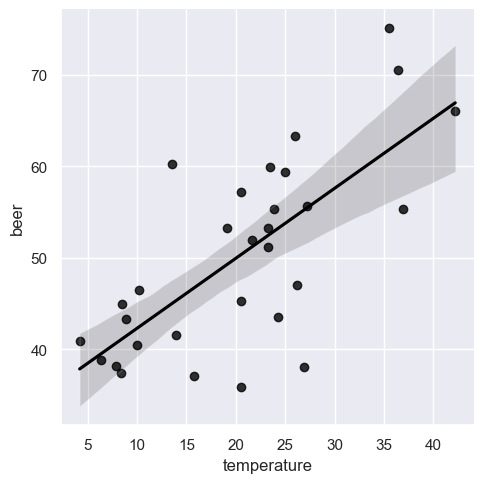

In [12]:
# 绘制回归直线

sns.lmplot(x="temperature", y="beer", data=beer,
    scatter_kws={'color': 'black'},
    line_kws={'color': 'black'})

# 阴影部分是回归直线95%的置信区间

## 使用模型进行预测

In [13]:
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [14]:
lm_model.predict(pd.DataFrame({"temperature": [0]})) # 预测0摄氏度时啤酒销量

0    34.610215
dtype: float64

In [15]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [16]:
lm_model.predict(pd.DataFrame({"temperature": [20]})) # 预测20摄氏度时啤酒销量

0    49.918767
dtype: float64

In [18]:
beta0 = lm_model.params['Intercept']
beta1 = lm_model.params['temperature']
temperature = 20

beta0 + beta1 * temperature

49.919

## 评估模型

In [19]:
resid = lm_model.resid # 获取残差
resid.head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [21]:
y_hat = beta0 + beta1 * beer.temperature # 手动计算残差
(beer.beer - y_hat).head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

## 决定系数
* 用来评估模型与已知数据的契合度
* 预测值和真实值相等时，决定系数为1

In [22]:
mu = np.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

np.sum((yhat - mu)**2) / np.sum((y - mu)**2)

0.504

In [23]:
lm_model.rsquared # 自动计算决定系数

0.504

## 修正决定系数
* 考虑了解释变量过多的情况

In [24]:
n = len(beer.beer)
s = 1
1 - ((np.sum(resid**2) / (n - s - 1)) / (np.sum((y-mu)**2) / (n - 1)))

0.486

In [25]:
lm_model.rsquared_adj

0.486

## 残差的直方图和散点图

<Axes: ylabel='Count'>

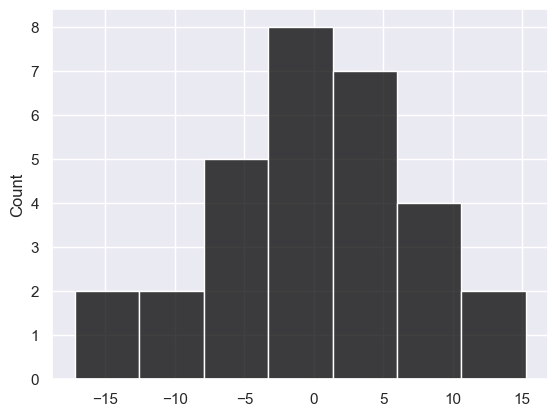

In [26]:
sns.histplot(resid, color='black')

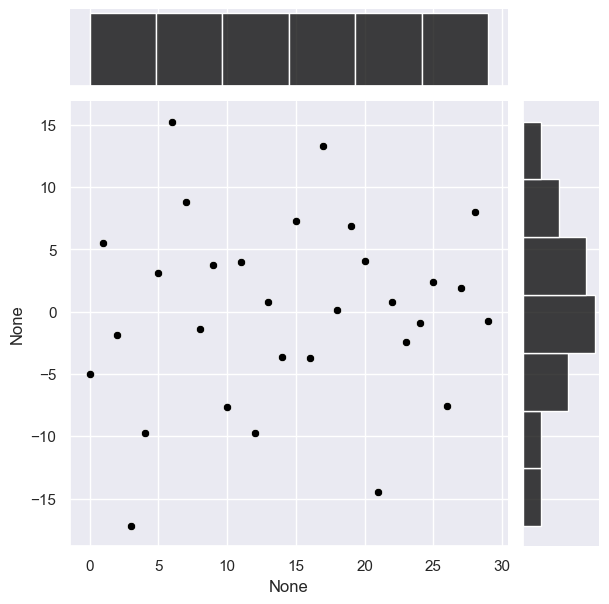

In [28]:
sns.jointplot((lm_model.fittedvalues, resid), joint_kws={'color': 'black'}, marginal_kws={'color': 'black'})

## 分位图

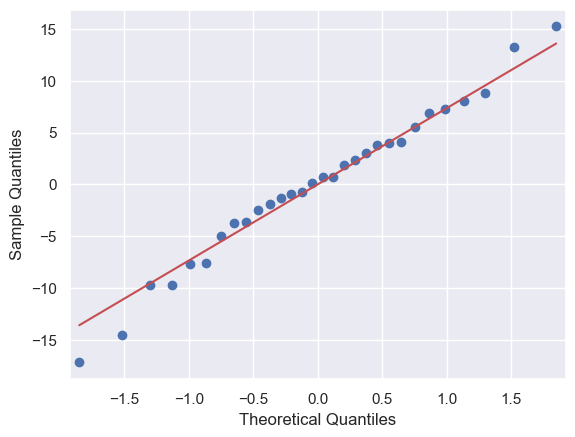

In [29]:
fig = sm.qqplot(resid, line='s')

## 偏度
* 表示直方图左右非对称性的方向和程度
* 偏度大于0则图形右侧更宽，反之左侧更宽
* 偏度等于0表示左右对称

# 峰度
* 表示直方图中心附近的尖锐程度
* 正态分布的峰度为3